In [138]:
# Libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import sklearn.linear_model as skl_lm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import roc_curve, auc
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn import preprocessing
from sklearn import neighbors
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.tree import plot_tree

import statsmodels.api as sm
import statsmodels.formula.api as smf
import os
import pprint

from sklearn import tree
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, precision_score, roc_curve, auc, mean_squared_error
import matplotlib.pyplot as plt


%matplotlib inline

In [139]:
print(os.getcwd())

c:\Users\Rory\OneDrive - Massachusetts Institute of Technology\Documents\Fall Semester\Optimization Methods\Project


In [140]:
#Adjust so all plots are the same
from matplotlib import pyplot as plt
plt.rcParams['figure.facecolor'] = 'lavender'
plt.rcParams['savefig.facecolor']= 'lavender'
plt.rcParams['axes.facecolor'] = 'oldlace'
plt.rc('axes',edgecolor='black')

In [141]:
# Reading in emissions data
df = pd.read_csv('Food_Production.csv')
df.head()

,Food product,Land use change,Animal Feed,Farm,Processing,Transport,Packging,Retail,Total_emissions,Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal),...,Freshwater withdrawals per 100g protein (liters per 100g protein),Freshwater withdrawals per kilogram (liters per kilogram),Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal),Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein),Land use per 1000kcal (m² per 1000kcal),Land use per kilogram (m² per kilogram),Land use per 100g protein (m² per 100g protein),Scarcity-weighted water use per kilogram (liters per kilogram),Scarcity-weighted water use per 100g protein (liters per 100g protein),Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)
0,Wheat & Rye (Bread),0.1,0.0,0.8,0.2,0.1,0.1,0.1,1.4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Maize (Meal),0.3,0.0,0.5,0.1,0.1,0.1,0.0,1.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Barley (Beer),0.0,0.0,0.2,0.1,0.0,0.5,0.3,1.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Oatmeal,0.0,0.0,1.4,0.0,0.1,0.1,0.0,1.6,4.281357,...,371.076923,482.4,0.945482,1.907692,2.897446,7.6,5.846154,18786.2,14450.92308,7162.104461
4,Rice,0.0,0.0,3.6,0.1,0.1,0.1,0.1,4.0,9.514379,...,3166.760563,2248.4,1.207271,6.267606,0.759631,2.8,3.943662,49576.3,69825.77465,13449.891480


In [142]:
df.describe()

,Land use change,Animal Feed,Farm,Processing,Transport,Packging,Retail,Total_emissions,Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal),Eutrophying emissions per kilogram (gPO₄eq per kilogram),...,Freshwater withdrawals per 100g protein (liters per 100g protein),Freshwater withdrawals per kilogram (liters per kilogram),Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal),Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein),Land use per 1000kcal (m² per 1000kcal),Land use per kilogram (m² per kilogram),Land use per 100g protein (m² per 100g protein),Scarcity-weighted water use per kilogram (liters per kilogram),Scarcity-weighted water use per 100g protein (liters per 100g protein),Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)
count,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,33.000000,38.000000,...,26.000000,38.000000,33.000000,27.000000,33.000000,38.000000,27.000000,38.000000,26.000000,30.000000
mean,1.260465,0.453488,3.469767,0.253488,0.195349,0.269767,0.069767,5.972093,27.181547,46.141316,...,1437.975324,932.605263,5.633943,13.524906,12.423165,29.264474,29.105042,36607.428947,59196.438503,17380.575408
std,3.357730,0.919200,7.083264,0.372475,0.158795,0.342633,0.110270,10.501753,46.445959,82.808808,...,1441.981970,1296.999186,10.613575,19.427462,28.348693,78.490074,49.307339,56891.283046,89928.189299,16232.080209
min,-2.100000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.200000,0.708419,0.690000,...,32.375000,0.000000,0.069919,0.263319,0.273756,0.330000,3.000000,0.000000,421.250000,4.095023
25%,0.000000,0.000000,0.350000,0.000000,0.100000,0.100000,0.000000,0.850000,4.214932,3.752500,...,373.573281,105.500000,0.628415,4.027439,1.312500,1.112500,5.088235,3325.075000,11018.401008,2969.124983
50%,0.200000,0.000000,0.800000,0.100000,0.100000,0.100000,0.000000,1.600000,7.000000,11.460000,...,1083.327272,417.100000,1.351351,6.500000,2.976244,6.865000,7.936314,14533.050000,20917.213595,12605.256790
75%,0.800000,0.000000,2.200000,0.300000,0.200000,0.300000,0.150000,6.000000,26.324324,45.840000,...,1832.386339,1340.375000,5.335135,14.983333,6.605405,14.917500,23.002381,35960.175000,70651.721023,28056.471593
max,16.300000,2.900000,39.400000,1.300000,0.800000,1.600000,0.300000,59.600000,197.357143,365.290000,...,6003.333333,5605.200000,50.946429,93.300000,119.490842,369.810000,184.812594,229889.800000,431620.000000,49735.882350


In [143]:
info = pd.DataFrame({"Type": df.dtypes, "Unique": df.nunique(), "Missing%": (df.isnull().sum()/df.shape[0])*100})
info

,Type,Unique,Missing%
Food product,object,43,0.000000
Land use change,float64,21,0.000000
Animal Feed,float64,10,0.000000
Farm,float64,24,0.000000
Processing,float64,10,0.000000
Transport,float64,8,0.000000
Packging,float64,10,0.000000
Retail,float64,4,0.000000
Total_emissions,float64,33,0.000000
Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal),float64,33,23.255814


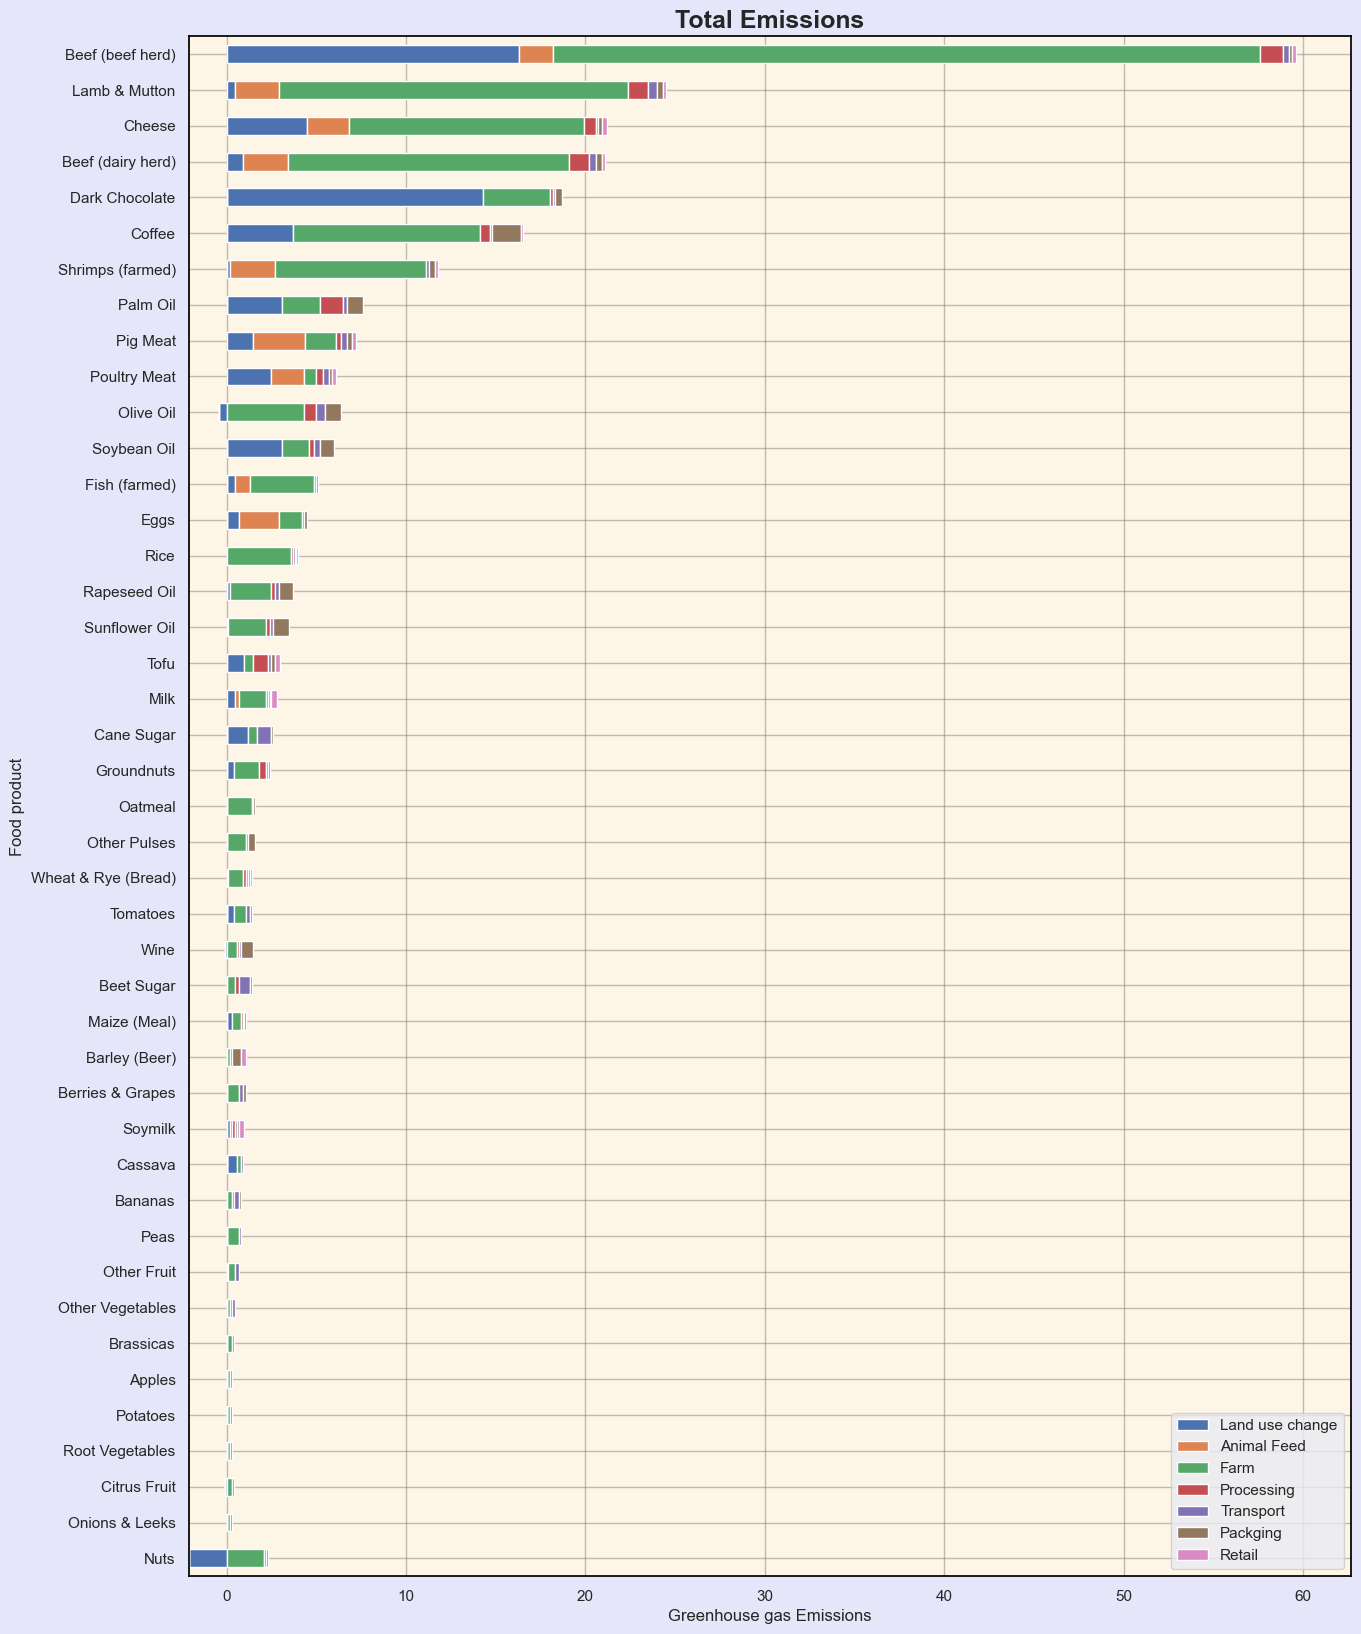

In [144]:
# Sorting df by total emissions
sorted_total_emissions = df.sort_values(by= "Total_emissions", ascending= True).iloc[:,:8]

# Plotting by total emissions
fig, ax = plt.subplots(figsize=(15,20))
sns.set()
sorted_total_emissions.set_index('Food product').plot(kind='barh', stacked=True, ax= ax)
plt.title('Total Emissions', fontsize=18, fontweight = 'bold')
plt.xlabel("Greenhouse gas Emissions")
plt.grid(color='grey', alpha = 0.5)
plt.show()

In [145]:
# Reading in data
nutri = pd.read_csv('Nutrition.csv')
nutri.head()

,Unnamed: 0,name,serving_size,calories,total_fat,saturated_fat,cholesterol,sodium,choline,folate,...,fat,saturated_fatty_acids,monounsaturated_fatty_acids,polyunsaturated_fatty_acids,fatty_acids_total_trans,alcohol,ash,caffeine,theobromine,water
0,0,Cornstarch,100 g,381,0.1g,NaN,0,9.00 mg,0.4 mg,0.00 mcg,...,0.05 g,0.009 g,0.016 g,0.025 g,0.00 mg,0.0 g,0.09 g,0.00 mg,0.00 mg,8.32 g
1,1,"Nuts, pecans",100 g,691,72g,6.2g,0,0.00 mg,40.5 mg,22.00 mcg,...,71.97 g,6.180 g,40.801 g,21.614 g,0.00 mg,0.0 g,1.49 g,0.00 mg,0.00 mg,3.52 g
2,2,"Eggplant, raw",100 g,25,0.2g,NaN,0,2.00 mg,6.9 mg,22.00 mcg,...,0.18 g,0.034 g,0.016 g,0.076 g,0.00 mg,0.0 g,0.66 g,0.00 mg,0.00 mg,92.30 g
3,3,"Teff, uncooked",100 g,367,2.4g,0.4g,0,12.00 mg,13.1 mg,0,...,2.38 g,0.449 g,0.589 g,1.071 g,0,0,2.37 g,0,0,8.82 g
4,4,"Sherbet, orange",100 g,144,2g,1.2g,1mg,46.00 mg,7.7 mg,4.00 mcg,...,2.00 g,1.160 g,0.530 g,0.080 g,1.00 mg,0.0 g,0.40 g,0.00 mg,0.00 mg,66.10 g


In [146]:
# Drop the first column
nutri = nutri.iloc[:, 1:]

In [147]:
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

In [148]:
# Replace values in the 'Food product' column
replacement_mapping = {
    'Oatmeal': 'Oats',
    'Root Vegetables': 'Turnips',
    'Citrus Fruit': 'Mandarin Orange',
    'Pig Meat': 'Pork',
    'Poultry Meat': 'Chicken Meat',
    'Other Pulses': 'Beans',
    'Groundnuts': 'Peanuts',
    'Other Fruit': 'Melon',
    'Brassicas': 'Cabbage'
}

# Apply the replacements
df['Food product'] = df['Food product'].replace(replacement_mapping)

# Display the updated dataframe
print(df['Food product'])

0     Wheat & Rye (Bread)
1            Maize (Meal)
2           Barley (Beer)
3                    Oats
4                    Rice
5                Potatoes
6                 Cassava
7              Cane Sugar
8              Beet Sugar
9                   Beans
10                   Peas
11                   Nuts
12                Peanuts
13                Soymilk
14                   Tofu
15            Soybean Oil
16               Palm Oil
17          Sunflower Oil
18           Rapeseed Oil
19              Olive Oil
20               Tomatoes
21         Onions & Leeks
22                Turnips
23                Cabbage
24       Other Vegetables
25        Mandarin Orange
26                Bananas
27                 Apples
28       Berries & Grapes
29                   Wine
30                  Melon
31                 Coffee
32         Dark Chocolate
33       Beef (beef herd)
34      Beef (dairy herd)
35          Lamb & Mutton
36                   Pork
37           Chicken Meat
38          

In [149]:
# Lowering threshold 

# Extract the column you want to find matches for in df
column_to_match = df['Food product']

# Create a list to store the top 10 matches for each value in the column
top_30_matches = []

# Iterate through each value in the column
for value in column_to_match:
    # Use fuzzywuzzy's process.extractBests to find the top 30 matches
    matches = process.extractBests(value, nutri['name'], score_cutoff=60, limit=30)
    top_30_matches.append(matches)


In [151]:
# Create a dictionary to store the selected matches
selected_matches_new = {}

# Iterate through each value in the 'Food product' column
for i, value in enumerate(column_to_match):
    # Display the top 10 matches and their scores if available
    print(f"Original Value: {value}")
    
    if not top_30_matches[i]:
        print("No matches found in the top 10.")
        selected_matches_new[value] = None  # Store None if no match is found
    else:
        for j, (match, score, _) in enumerate(top_30_matches[i]):
            print(f"{j}: Match: {match} (Score: {score})")

        # Manually select the best match based on your criteria
        selected_index = int(input("Enter the index of the best match (0-9), or -1 if none are suitable: "))

        if selected_index >= 0 and selected_index < 30:
            # Use the selected match
            selected_match = top_30_matches[i][selected_index][0]
            selected_matches_new[value] = selected_match  # Store the selected match
            print(f"Selected Match: {selected_match}")
            # Now you can use selected_match for further processing or store it in your DataFrame
        elif selected_index == -1:
            print("No suitable match selected.")
            selected_matches_new[value] = None  # Store None if no suitable match is selected
        else:
            print("Invalid index entered. Please enter a valid index between 0 and 9.")

# After the loop, you can access selected_matches to see your selections
print("Selected Matches:")
for original_value, selected_value in selected_matches_new.items():
    print(f"Original Value: {original_value}, Selected Value: {selected_value}")


Original Value: Wheat & Rye (Bread)
0: Match: Bread, wheat (Score: 86)
1: Match: Wheat, durum (Score: 86)
2: Match: Bread, rye (Score: 86)
3: Match: Bread, egg (Score: 86)
4: Match: Rye grain (Score: 86)
5: Match: Wheat, cooked, KAMUT khorasan (Score: 86)
6: Match: Bread, bollilo, Mexican, roll (Score: 86)
7: Match: English muffins, whole-wheat (Score: 86)
8: Match: Crackers, wheat, melba toast (Score: 86)
9: Match: Crackers, plain, wafers, rye (Score: 86)
10: Match: PEPPERIDGE FARM, White Bread (Score: 86)
11: Match: Tennis Bread, plain (Apache) (Score: 86)
12: Match: Bread, toasted, pumpernickel (Score: 86)
13: Match: Bread, enriched, white, pita (Score: 86)
14: Match: Muffins, dry mix, wheat bran (Score: 86)
15: Match: Crackers, whole-wheat, matzo (Score: 86)
16: Match: Crackers, reduced fat, wheat (Score: 86)
17: Match: Bread, rye, reduced-calorie (Score: 86)
18: Match: Bread, canned, boston brown (Score: 86)
19: Match: KEEBLER, Wheat Crackers, TOASTEDS (Score: 86)
20: Match: Bread

In [152]:
selected_matches_new

{'Wheat & Rye (Bread)': 'Bread, wheat',
 'Maize (Meal)': 'Barley flour or meal',
 'Barley (Beer)': 'Alcoholic beverage, BUDWEISER, regular, beer',
 'Oats': 'Oats',
 'Rice': 'Wild rice, raw',
 'Potatoes': 'Potatoes, skin, raw',
 'Cassava': 'Cassava, raw',
 'Cane Sugar': 'Sugar, turbinado',
 'Beet Sugar': 'Sugar, turbinado',
 'Beans': 'Beans, raw, mature seeds, pinto',
 'Peas': 'Peas, raw, green',
 'Nuts': 'Nuts, pecans',
 'Peanuts': 'Peanuts, raw, all types',
 'Soymilk': 'SILK Plain, soymilk',
 'Tofu': 'HOUSE FOODS Premium Firm Tofu',
 'Soybean Oil': 'Oil, soybean lecithin',
 'Palm Oil': 'Oil, palm',
 'Sunflower Oil': 'Oil, corn and canola',
 'Rapeseed Oil': 'Oil, grapeseed',
 'Olive Oil': 'Oil, salad or cooking, olive',
 'Tomatoes': 'Tomatoes, raw, orange',
 'Onions & Leeks': 'Onions, unprepared, chopped, frozen',
 'Turnips': 'Turnips, raw',
 'Cabbage': 'Cabbage, cooked, napa',
 'Other Vegetables': 'Vegetables, unprepared, frozen, mixed',
 'Mandarin Orange': 'Tangerines, raw, (mandarin

In [153]:
# Iterate through selected_matches_new and print keys with None values
print("Keys with None values:")
for key, value in selected_matches_new.items():
    if value is None:
        print(key)


Keys with None values:


In [154]:
# Assuming 'food product' is the common column in both DataFrames
df['Matched_food_product'] = df['Food product'].map(selected_matches_new)

# Merge df and nutri based on the 'Matched_food_product' column
merged_df = df.merge(nutri, left_on='Matched_food_product', right_on='name', how='inner')


In [155]:
merged_df.head()

,Food product,Land use change,Animal Feed,Farm,Processing,Transport,Packging,Retail,Total_emissions,Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal),...,fat,saturated_fatty_acids,monounsaturated_fatty_acids,polyunsaturated_fatty_acids,fatty_acids_total_trans,alcohol,ash,caffeine,theobromine,water
0,Wheat & Rye (Bread),0.1,0.0,0.8,0.2,0.1,0.1,0.1,1.4,NaN,...,3.24 g,0.777 g,0.607 g,1.499 g,0.00 mg,0.0 g,2.16 g,0.00 mg,0.00 mg,35.20 g
1,Maize (Meal),0.3,0.0,0.5,0.1,0.1,0.1,0.0,1.1,NaN,...,1.60 g,0.335 g,0.205 g,0.771 g,0.00 mg,0.0 g,1.28 g,0.00 mg,0.00 mg,12.11 g
2,Barley (Beer),0.0,0.0,0.2,0.1,0.0,0.5,0.3,1.1,NaN,...,0.00 g,0,0,0,0.00 mg,3.9 g,0.11 g,0,0,92.77 g
3,Oats,0.0,0.0,1.4,0.0,0.1,0.1,0.0,1.6,4.281357,...,6.90 g,1.217 g,2.178 g,2.535 g,0.00 mg,0.0 g,1.72 g,0,0,8.22 g
4,Rice,0.0,0.0,3.6,0.1,0.1,0.1,0.1,4.0,9.514379,...,1.08 g,0.156 g,0.159 g,0.676 g,0.00 mg,0.0 g,1.53 g,0.00 mg,0.00 mg,7.76 g


In [156]:
# Assuming merged_df is your merged dataframe
merged_df.to_csv('processed.csv', index=False)


In [157]:
merged_df.columns

Index(['Food product', 'Land use change', 'Animal Feed', 'Farm', 'Processing',
       'Transport', 'Packging', 'Retail', 'Total_emissions',
       'Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)',
       'Eutrophying emissions per kilogram (gPO₄eq per kilogram)',
       'Eutrophying emissions per 100g protein (gPO₄eq per 100 grams protein)',
       'Freshwater withdrawals per 1000kcal (liters per 1000kcal)',
       'Freshwater withdrawals per 100g protein (liters per 100g protein)',
       'Freshwater withdrawals per kilogram (liters per kilogram)',
       'Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal)',
       'Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein)',
       'Land use per 1000kcal (m² per 1000kcal)',
       'Land use per kilogram (m² per kilogram)',
       'Land use per 100g protein (m² per 100g protein)',
       'Scarcity-weighted water use per kilogram (liters per kilogram)',
       'Scarcity-weighted water use per 100g protein 